##### Supervised Learning: Artificial Neural Network by neurolab module

include
- generate random samples inside a circle
- use neurolab module
- use train_test_split for training and testing
- check Lesson_randsphere.py for more graphs of random sample in cirlce and sphere.

special cpmmands used here
- train_test_split, neurolab.net.newff,
- the training function, activation function, error function of neurolab.net
- add_artist, plt.Circle

pip install neurolab

In [1]:
from scipy.special import gammainc
import numpy as np
def randsphere(center, radius, n_per_sphere):
    r = radius
    ndim = center.size
    x = np.random.normal(size=(n_per_sphere, ndim))
    ssq = np.sum(x ** 2, axis=1)
    fr = r * gammainc(ndim / 2, ssq / 2) ** (1 / ndim)\
    / np.sqrt(ssq)
    frtiled = np.tile(fr.reshape(n_per_sphere, 1), (1, ndim))
    p = center + np.multiply(x, frtiled)
    return p

Trainer(TrainBFGS)
Epoch: 100; Error: 0.1442871288179701;
Epoch: 200; Error: 0.06467788719235518;
Epoch: 300; Error: 0.03151882343652557;
Epoch: 400; Error: 0.021824606849105064;
Epoch: 500; Error: 0.017308591695679693;
Epoch: 600; Error: 0.013431570829712712;
Epoch: 700; Error: 0.012373656390003516;
The goal of learning is reached
Mean Square Error in training:0.000056
Sum Square Error in training:0.009976
Sum Square Error in testing:0.040371


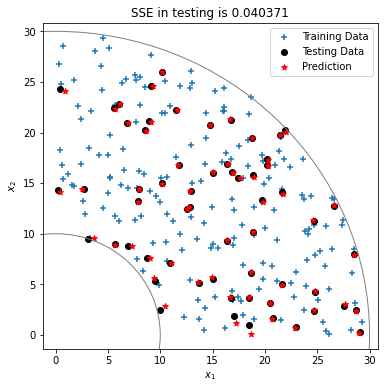

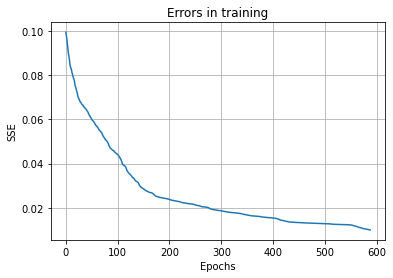

In [2]:
'''
This program use neural network modules from neurolab
which is similar to the counterpart in MATLAB.
'''
import sys
sys.path.append('../Lib/') # to use self-defined function
import numpy as np
import neurolab as nl
import matplotlib.pyplot as plt
#from Lib_GenData import randsphere
from sklearn.model_selection import train_test_split

# ------ A simple example from menu ------------
# Create train samples
# input = np.random.uniform(-0.5, 0.5, (10, 2))
# target = (input[:, 0] + input[:, 1]).reshape(10, 1)
# # Create network with 2 inputs, 5 neurons in input layer and 1 in output layer
# net = nl.net.newff([[-0.5, 0.5], [-0.5, 0.5]], [5, 1])
# # Train process
# err = net.train(input, target, epochs=500, show=100, goal=0.01) # show default value
# # simulate net
# target_hat = net.sim(input)
# ---------------------------------------------
# generate training data of Robot arms
l1, l2 = 20, 10
n = 1000
# data distributed randomly in a circle
center = np.array([0, 0])
radius_in, radius_out =10, 30
p = randsphere(center, radius_out, n)
p = p[(p[:,0] > 0) & (p[:,1] > 0), :] # sample in the first quadrant
d = np.sum(p**2, axis=1)
p = p[d >= radius_in**2, :] # sample in the fan area
x1, x2 = p[:,0], p[:,1]
x_train, x_test, y_train, y_test = \
    train_test_split(x1, x2, test_size = 0.25)

theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
# --------------------------------------------------
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
ax.scatter(x_train, y_train, marker='+',  label = 'Training Data')
ax.scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
ax.add_artist(plt.Circle(center, radius_out,
        fill=False, color='0.5'))
ax.add_artist(plt.Circle(center, radius_in,
        fill=False, color='0.5'))        
# --------------------------------------------------
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [20, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]], 
    size = hidden_output_layers, transf = transf)
#change traning func, the default training function for rrgression is train_bfgs
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
# net.trainf = nl.train.train_cg # Newton-CG method Using scipy.optimize.fmin_ncg
# net.trainf = nl.train.train_gd
# net.trainf = nl.train.train_gdx
# net.errorf = nl.error.MSE() # default is SSE()
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, \
    goal = 0.01) # show := print period, the return is an error function 
# predicted output for training data
OutputY_hat = net.sim(InputX) 
# theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]
# predicted output for testing data
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]

x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax.scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')

mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
print("Mean Square Error in training:{:.6f}".format(mse(OutputY, OutputY_hat)))
print("Sum Square Error in training:{:.6f}".format(sse(OutputY, OutputY_hat)))
print("Sum Square Error in testing:{:.6f}".format(sse_test))
plt.title('SSE in testing is {:.6f}'.format(sse_test))
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
# img_dir = "C:/Users/CCWANG/OneDrive/FromDropBox/Public/book/PyImages/"
# plt.savefig(img_dir + "neurolab_20.eps", format='eps')
plt.show()
# plt.plot(err) # plot training error function: SSE
err = np.reshape(err, (-1, 1))
plt.plot(err[err < 0.1])
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.grid(True)
plt.title('Errors in training')
# plt.savefig(img_dir + "neurolab_20_err.eps", format='eps')
plt.show()
